In [1]:
from scipy.io import loadmat
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.optimize as op

In [2]:
#load the data 
ex4data=loadmat('ex4data1.mat')
X=ex4data["X"]
y=ex4data["y"]

In [3]:
#X holds 5000 images of 400 pixels total (20x20)
m=X.shape[0]
print(X.shape[0],'\n')
print(X[1,:].shape)

5000 

(400,)


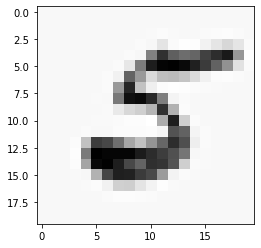

In [4]:
#display one image 
imgplot = plt.imshow(np.reshape(X[2600,:],(20,20)).T,cmap=plt.get_cmap('Greys'))

In [5]:
#load up the pre-initialized neural network parameters 
ex4weights=loadmat('ex4weights.mat')
Theta1=ex4weights['Theta1']
Theta2=ex4weights['Theta2']
print(Theta1.shape, Theta2.shape)

(25, 401) (10, 26)


In [6]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [7]:
#first let's set up the results array
yk=np.zeros((m,num_labels))

for i in range(m):
    ind=y[i]
    yk[i,ind-1]=1.0

In [8]:
#Define an activation function and the gradient
def sigmoid(z):
    g=1.0/(1.0+np.exp(-z)) 
    return g

def sigmoidGradient(z):
    g=sigmoid(z)*(1-sigmoid(z))
    return g

In [9]:
# Next, feed forward to get the cost function (without regularization, which means lambda equals 0) 

#add bias unit to X and hidden layer and propagate forward 
a1=np.hstack((np.ones((5000,1)),X)).T
z2=Theta1@a1 
a2=sigmoid(z2) 

a2=np.vstack((np.ones((1,5000)),a2))
z3=Theta2@a2 
hx=sigmoid(z3)

In [10]:
#now compute the cost
ksum=np.sum((-yk*np.log(hx.T) - (1-yk)*np.log(1-hx.T)),1); 
mksum=np.sum(ksum);
J=(1/m)*mksum;

print("Cost at parameters (loaded from ex4weights):", J, "\n"
       "(this value should be about 0.287629)")

Cost at parameters (loaded from ex4weights): 0.2876291651613189 
(this value should be about 0.287629)


In [11]:
#implement regularization and check the cost again 
lam=1

Theta1sum=np.sum(np.sum((Theta1[:,1:]**2),1))
Theta2sum=np.sum(np.sum((Theta2[:,1:]**2),1))
J=J+(lam/(2*m))*(Theta1sum+Theta2sum)

print("Cost at parameters (loaded from ex4weights):", J, "\n"
        "(this value should be about 0.383770)")

Cost at parameters (loaded from ex4weights): 0.38376985909092365 
(this value should be about 0.383770)


In [12]:
#then, implement backpropagation on the neural network we set up earlier 
# during the feed forward step to compute the gradients for theta 1 and 
# theta2 

# put together the cost and gradient calulation into a function

def nnCostFunction(nnparams, X, y, lam):
    #re roll the thetas 
    theta1=nnparams[:hidden_layer_size*(input_layer_size+1)].\
        reshape((hidden_layer_size, (input_layer_size + 1)))
    theta2=nnparams[hidden_layer_size*(input_layer_size+1):].\
        reshape((num_labels,(hidden_layer_size+ 1)))
    
    m = np.shape(X)[0];
    J = 0;

    #FEED FORWARD 
    a1=np.hstack((np.ones((5000,1)),X)).T
    z2=theta1@a1 
    a2=sigmoid(z2) 

    a2=np.vstack((np.ones((1,5000)),a2))
    z3=theta2@a2 
    hx=sigmoid(z3)
    
    #Compute Cost
    ksum=np.sum((-yk*np.log(hx.T) - (1-yk)*np.log(1-hx.T)),1); 
    mksum=np.sum(ksum);
    
    theta1sum=np.sum(np.sum((theta1[:,1:]**2),1))
    theta2sum=np.sum(np.sum((theta2[:,1:]**2),1))
    J=J+(lam/(2*m))*(theta1sum+theta2sum)
    
    return J

def nnGrad(nnparams, X, y, lam):
    #reroll the thetas 
    theta1=nnparams[:hidden_layer_size*(input_layer_size+1)].\
        reshape((hidden_layer_size, (input_layer_size + 1)))
    theta2=nnparams[hidden_layer_size*(input_layer_size+1):].\
        reshape((num_labels,(hidden_layer_size+1)))
  
    m = np.shape(X)[0];
    theta1_grad = np.zeros(np.shape(theta1));
    theta2_grad = np.zeros(np.shape(theta2));

    # now implement backpropagation
    delta_1=0; 
    delta_2=0; 

    for t in range(m): 
        a1=np.vstack((np.atleast_2d(1),np.atleast_2d(X[t,:]).T))
        z2=theta1@a1 
        a2=sigmoid(z2) 
        a2=np.vstack((np.atleast_2d(1),a2))
        z3=theta2@a2 
        a3=sigmoid(z3)     
        d3=a3-np.atleast_2d(yk[t,:]).T; 
        d2=(theta2[:,1:].T@d3)*sigmoidGradient(z2)
        delta_1=delta_1+(d2@a1.T)
        delta_2=delta_2+(d3@a2.T)

    theta1[:,0]=0; 
    theta2[:,0]=0; 
    theta1_grad=(1/m)*delta_1+(lam/m)*theta1; 
    theta2_grad=(1/m)*delta_2+(lam/m)*theta2; 

    grad=np.concatenate((theta1_grad.ravel(),theta2_grad.ravel()))
    
    return grad

In [13]:
#epsilon_int=0.12; 
#initial_theta1=np.random.rand(hidden_layer_size,1+input_layer_size) * 2 * epsilon_int - epsilon_int ; 
#initial_theta2=np.random.rand(num_labels,1+hidden_layer_size) * 2 * epsilon_int - epsilon_int ; 
#initial_nn_params = np.concatenate((initial_theta1.ravel(), initial_theta2.ravel()))

In [14]:
# now implement a neural network from start to end 
# start with the given weights
nn_params=np.concatenate((Theta1.ravel(),Theta2.ravel()))

In [16]:
#train the neural network 
lam=0
thetas=op.minimize(nnCostFunction, nn_params, args=(X,y,lam), \
                   method='CG', jac=nnGrad)

In [17]:
thetas

     fun: 0.0
     jac: array([ 6.18712766e-05,  0.00000000e+00,  0.00000000e+00, ...,
        9.66104721e-05, -7.57736846e-04,  7.73329872e-04])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 113
     nit: 0
    njev: 101
  status: 2
 success: False
       x: array([ 0.00000000e+00, -1.05624163e-08,  2.19414684e-09, ...,
       -2.47795788e-01,  1.28009118e+00, -1.32752042e+00])

In [18]:
#reroll the result 
Theta1_opt=thetas.x[:hidden_layer_size*(input_layer_size+1)].\
        reshape((hidden_layer_size, (input_layer_size + 1)))
Theta2_opt=thetas.x[hidden_layer_size*(input_layer_size+1):].\
        reshape((num_labels,(hidden_layer_size+ 1)))

In [19]:
#now, let's check the prediction
a1=np.hstack((np.ones((5000,1)),X)).T
z2=Theta1_opt@a1
a2=sigmoid(z2) 

a2=np.vstack((np.ones((1,5000)),a2))
z3=Theta2_opt@a2 
hx=sigmoid(z3)

In [23]:
p = [np.argmax(hx[:,i]) for i in range(m)]
p = np.add(p,1)

In [24]:
(sum((p==y.ravel()))/5000) * 100

97.52

In [25]:
#compare to pre loaded Thetas
a1=np.hstack((np.ones((5000,1)),X)).T
z2=np.dot(Theta1,a1) 
a2=sigmoid(z2) 

a2=np.vstack((np.ones((1,5000)),a2))
z3=np.dot(Theta2,a2) 
hx=sigmoid(z3)

p = [np.argmax(hx[:,i]) for i in range(m)]
p=np.add(p,1)

(sum((p==y.ravel()))/5000) * 100

97.52